# <span style="color:darkblue"> Lecture 20: Text Analysis </span>

<font size = "5">

Intro text analysis

https://www.youtube.com/watch?v=IRKDrrzh4dE

# <span style="color:darkblue"> I. Setup Working Environment </span>

In [2]:

# Import SK-Learn library for machine learning functions
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS 
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split



# Import standard data analysis packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Kmenas
from sklearn.cluster import MiniBatchKMeans

import faiss


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# <span style="color:darkblue"> II. Data </span>

<font size = "5">

We will analyze a dataset on Amazon Reviews

https://www.kaggle.com/datasets/yasserh/amazon-product-reviews-dataset/data


In [3]:
data = pd.read_csv("data_raw/amazon_reviews.csv")

len(data)


1597

<font size = "5">

Check features

In [4]:
data.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'dateAdded',
       'dateUpdated', 'dimension', 'ean', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'prices', 'reviews.date',
       'reviews.doRecommend', 'reviews.numHelpful', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'sizes',
       'upc', 'weight'],
      dtype='object')

<font size = "5">

Check text

In [5]:
reviews = data["reviews.text"]

<font size = "5">

Check rating

(array([ 42.,   0.,  34.,   0.,   0., 124.,   0., 236.,   0., 741.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

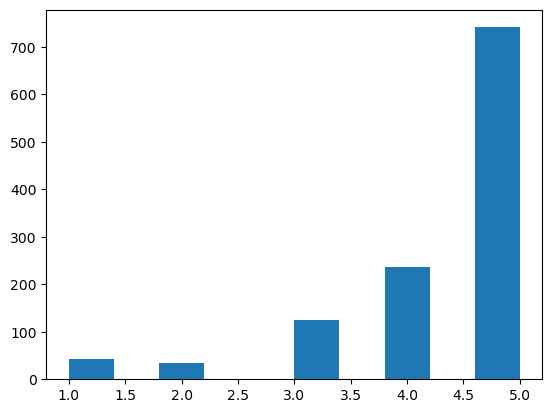

In [6]:
plt.hist(x = data["reviews.rating"])


<font size = "5">

Filter non-missing ratings data

- 26% missing data!
- Could generate selection bias in reviews

In [7]:
# Check for missing values
# A lot of reviews are missing review data
missing_values = data["reviews.rating"].isnull().sum()
percent_missing = missing_values /len(data)
print(percent_missing)

# Extract non-missing data
data_nonmissing = data[data["reviews.rating"].notnull()]

0.2629931120851597


# <span style="color:darkblue"> III. Bag of Words </span>


<font size = "5">

Stop words

- Commonly used words
- Available for different languages



In [8]:
# First ten English stop words
list(ENGLISH_STOP_WORDS)[0:10]

['everyone',
 'many',
 'often',
 'due',
 'hers',
 'either',
 'rather',
 'beside',
 'first',
 'everything']

<font size = "5">

Create custom stop words

In [9]:
# Here we added Python to the list of stop words
custom_stop_words = list(ENGLISH_STOP_WORDS) + ["Python"]

# You can also create your own list
# custom_stop_words = ["and","or","how"]


<font size = "5">

Count vectorizer

- Check for distinct words across all reviews
- Remove any stop words
- ```min_df``` is used to filter out words depending <br>
on how often they occur. For example, ```min_df=3``` <br>
only keeps words if they are mentioned at least 3 times

In [10]:
word_model = CountVectorizer(min_df=1,
                       stop_words=custom_stop_words)
word_model.fit(reviews)

/Users/asanc31/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['python'] not in stop_words.
  warnings.warn(


CountVectorizer(stop_words=['everyone', 'many', 'often', 'due', 'hers',
                            'either', 'rather', 'beside', 'first', 'everything',
                            'are', 'with', 'therein', 'per', 'cant', 'myself',
                            'whereas', 'except', 'two', 'at', 'give', 'both',
                            'someone', 'such', 'there', 'throughout', 'show',
                            'seems', 'you', 'everywhere', ...])

<font size = "5">

Check Vocabulary

- Check in VS-Code Data Viewer
- You can use preliminary findings to decide whether <br>
to add more stop words

In [11]:
# Extract words in vocabulary and frequency
vocabulary = word_model.vocabulary_

# Convert to dataframew
frequency_words  = pd.DataFrame(vocabulary.items(),
                                columns=['Word', 'Frequency'])
                                
# Display sorted dataset                                
frequency_words.sort_values(by = "Frequency",ascending=False)

,Word,Frequency
4309,zumi,6194
4474,zooming,6193
4856,zoom,6192
5496,zombies,6191
2692,zippy,6190
...,...,...
1449,07,4
3398,04,3
484,000s,2
494,000,1


<font size = "5">

Create a dataset counting which words are used <br>
per review

- Each row is a different review
- Each column is a ${0,1}$ indicator on whether that <br>
word was mentioned
- Huge matrix!!

In [12]:
# Create X matrix
X = word_model.transform(reviews)

# Check dimension of X matrix
np.shape(X)

(1597, 6195)

<font size = "5">

Try it yourself!

Create a bag of words for the column "review.title".

- What are the most common words?



In [13]:
# Write your own code




# <span style="color:darkblue"> IV. Sentiment Analysis </span>

<font size = "5">
Sentiment analsys uses words to predict user ratings. <br>


- In this case we have ratings labels
- We'll use the data with nonmissing labels


In [14]:
# Write your own code

text = data_nonmissing["reviews.text"]
y    = data_nonmissing["reviews.rating"]

text_train, text_test, y_train, y_test = train_test_split(text, y,
                                                    random_state=0)

<font size = "5">

Extract vectorized X

In [15]:
# Create X matrix
word_model_train = CountVectorizer(min_df=1,
                       stop_words=custom_stop_words)
word_model_train.fit(text_train)
X_train = word_model.transform(text_train)

# Check dimension of X matrix
np.shape(X)

/Users/asanc31/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['python'] not in stop_words.
  warnings.warn(


(1597, 6195)

<font size = "5">

We can compress the data using <br>
truncated singular value decomposition (SVD)

- This is an alternative to PCA that is better suited <br>
for sparse, binary data like text

In [16]:
svd = TruncatedSVD(n_components=3,random_state=42);
svd.fit(X_train)
X_svd_train = svd.transform(X_train)
np.shape(X_svd_train)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


(882, 3)

[Text(0.5, 0, 'First Principal Component'),
 Text(0, 0.5, 'Second Principal Component')]

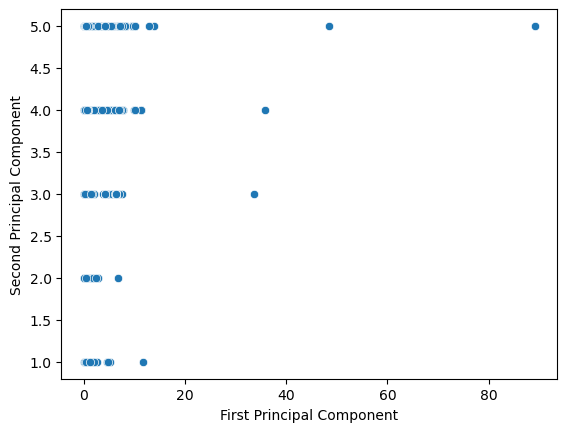

In [24]:
# Hue is used to color
ax = sns.scatterplot(x = X_svd_train[:,0],
                     y = y_train)
ax.set(xlabel='First Principal Component',
       ylabel='Second Principal Component')


<font size = "5">

Try it yourself!

Create a machine learning pipeline

- Run a support vector machine regression to predict user ratings
- What is the out-of-sample performance on the test data?
- Use your data to predict reviews that were missing
- How does the distribution of missing to non-missing reviews compare?



In [18]:
# Write your own code





<font size = "5">

Try it yourself!

- What happens if you change the minimum frequency of words <br>
and/or change the number of components?

In [19]:
# Write your own code



